<a href="https://colab.research.google.com/github/jw9603/AIM5021_41-/blob/main/7thweek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
import numpy as np

- Assume you have some TF-IDF vector for a
particular document and you want to
convert that to a topic vector -- how much
each word contributes to your topics
- Create three topics: petness, animalness,
and cityness
- “petness” topic will score words like “cat”
and “dog” significantly, but probably ignore
words like “NYC” and “apple.”
- If you “trained” your topic model like this,
without using a computer, only your
common sense, you might come up with
some weights like this:

In [4]:
topic = {}
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(),np.random.rand(6))))
print(tfidf)
topic['petness'] = (.3 * tfidf['cat'] +\
.3 * tfidf['dog'] +\
0 * tfidf['apple'] +\
0 * tfidf['lion'] -\
.2 * tfidf['NYC'] +\
.2 * tfidf['love'])
topic['animalness'] = (.1 * tfidf['cat'] +\
.1 * tfidf['dog'] -\
.1 * tfidf['apple'] +\
.5 * tfidf['lion'] +\
.1 * tfidf['NYC'] -\
.1 * tfidf['love'])
topic['cityness'] = ( 0 * tfidf['cat'] -\
.1 * tfidf['dog'] +\
.2 * tfidf['apple'] -\
.1 * tfidf['lion'] +\
.5 * tfidf['NYC'] +\
.1 * tfidf['love'])


{'cat': 0.5711725924602716, 'dog': 0.6015235083944895, 'apple': 0.7404687704598573, 'lion': 0.7649017527560855, 'NYC': 0.4414951073659238, 'love': 0.17327798446526066}


In [5]:
 print(topic)

{'petness': 0.29816540567629574, 'animalness': 0.45249532170759954, 'cityness': 0.2495265801064019}


In [6]:
word_vector = {}
word_vector['cat'] = .3*topic['petness'] +\
.1*topic['animalness'] +\
0*topic['cityness']
word_vector['dog'] = .3*topic['petness'] +\
.1*topic['animalness'] -\
.1*topic['cityness']
word_vector['apple']= 0*topic['petness'] -\
.1*topic['animalness'] +\
.2*topic['cityness']
word_vector['lion'] = 0*topic['petness'] +\
.5*topic['animalness'] -\
.1*topic['cityness']
word_vector['NYC'] = -.2*topic['petness'] +\
.1*topic['animalness'] +\
.5*topic['cityness']
word_vector['love'] = .2*topic['petness'] -\
.1*topic['animalness'] +\
.1*topic['cityness']
print(word_vector)

{'cat': 0.13469915387364867, 'dog': 0.10974649586300847, 'apple': 0.0046557838505204285, 'lion': 0.20129500284315957, 'NYC': 0.11037974108870177, 'love': 0.039336206975139384}


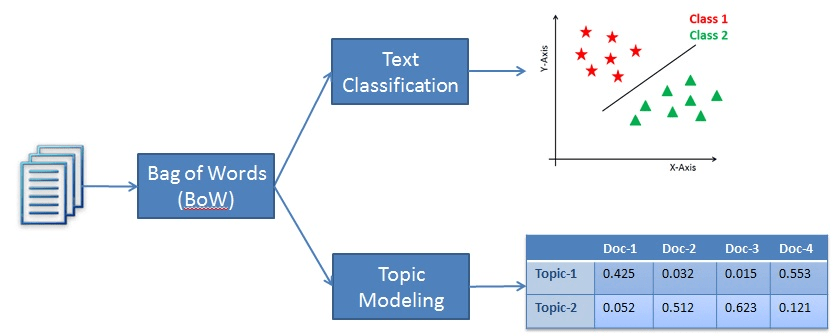

reference : https://www.datacamp.com/tutorial/discovering-hidden-topics-python

### Topic Modeling Algorithms
- LSA (Latent Semantic Analysis)
- PCA (Principle Component Analysis)
- LDiA (Latent Dirichlet allocation)

#### LSA (Latent Semantic Analysis)
- Uses SVD (Singular Value Decomposition) to find the combinations of words that are responsible,
together, for the biggest variation in the data
- Rotate TF-IDF vectors so that the new dimensions (basis vectors, topic vectors) of the rotated
vectors all align with these maximum variance directions
- Each of the dimensions (axes) becomes a combination of word frequencies rather than a single
word frequency - the weighted combinations of words that make up “topics” used throughout the
corpus
- Like the “IDF” part of TF-IDF, it tells which dimensions in the vector are important to the semantics of
the documents
- SVD reorders the words and topics, to put as much of the “weight” as possible along the diagonal
(https://topicmodels.west.uni-koblenz.de/ckling/tmt/svd_ap.html)
- This helps identify patterns that represent the meanings of both the topics and the words
- Algorithm should create a matrix of n terms X m topics that you can multiply by a vector of the word
frequencies in a document to get your new topic vector for that document
- We can discard those dimensions (topics) that have the least amount of variance between
documents; These low-variance topics are usually noise
- If every document has roughly the same amount of some topic and that topic doesn’t help tell the
documents apart, then we can get rid of it
- LSA compresses more meaning into fewer dimensions. We only have to retain the high-variance
dimensions, the major topics that your corpus talks about in a variety of ways (with high variance).
And each of these dimensions becomes your “topics,” with some weighted combination of all the
words captured in each one

기존의 DTM이나 DTM에 단어의 중요도에 따른 가중치를 주었던 TF-IDF 행렬은 단어의 의미를 전혀 고려하지 못한다는 단점을 갖고 있었습니다. LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있습니다. 
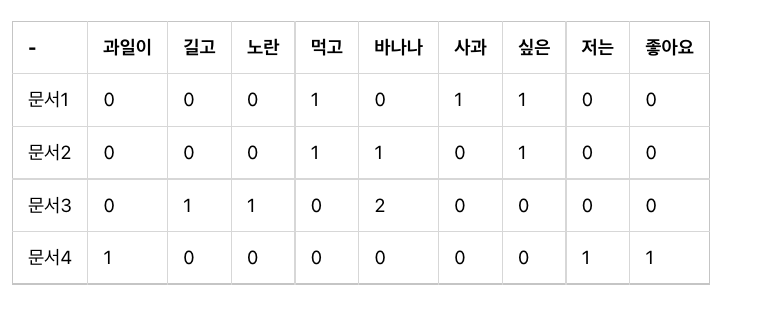

References : https://wikidocs.net/24949

##### 1. Full SVD

In [7]:
import numpy as np

위와 같은 DTM을 실제로 파이썬을 통해서 만들면 다음과 같다.


In [10]:
A = np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
print('DTM의 크기(shape) :', np.shape(A))
print(A)

DTM의 크기(shape) : (4, 9)
[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]


4 × 9의 크기를 가지는 DTM이 생성되었. 이에 대해서 풀 SVD(full SVD)를 수행해보자. 단, 여기서는 대각 행렬의 변수명을 Σ가 아니라 S를 사용한다. 또한 V의 전치 행렬을 VT라고 하자. 소수점의 길이가 너무 길게 출력하면 보기 힘들어서 두번째 자리까지만 출력하기위해서 .round(2)를 사용한다.

In [9]:
U, s, VT = np.linalg.svd(A, full_matrices = True)
print('행렬 U :')
print(U.round(2))
print('행렬 U의 크기(shape) :',np.shape(U))

행렬 U :
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]
행렬 U의 크기(shape) : (4, 4)


4 × 4의 크기를 가지는 직교 행렬 U가 생성되었다. 이제 대각 행렬 S를 확인해보자.

In [11]:
print('특이값 벡터 :')
print(s.round(2))
print('특이값 벡터의 크기(shape) :',np.shape(s))

특이값 벡터 :
[2.69 2.05 1.73 0.77]
특이값 벡터의 크기(shape) : (4,)


Numpy의 linalg.svd()는 특이값 분해의 결과로 대각 행렬이 아니라 특이값의 리스트를 반환한다. 그러므로 앞서 본 수식의 형식으로 보려면 이를 다시 대각 행렬로 바꾸어 주어야 한다. 우선 특이값을 s에 저장하고 대각 행렬 크기의 행렬을 생성한 후에 그 행렬에 특이값을 삽입해보자.

In [12]:
# 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S = np.zeros((4, 9))

# 특이값을 대각행렬에 삽입
S[:4, :4] = np.diag(s)

print('대각 행렬 S :')
print(S.round(2))

print('대각 행렬의 크기(shape) :')
print(np.shape(S))


대각 행렬 S :
[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]
대각 행렬의 크기(shape) :
(4, 9)


4 × 9의 크기를 가지는 대각 행렬 S가 생성되었다. 2.69 > 2.05 > 1.73 > 0.77 순으로 값이 내림차순을 보이는 것을 확인할 수 있다.

In [13]:
print('직교행렬 VT :')
print(VT.round(2))

print('직교 행렬 VT의 크기(shape) :')
print(np.shape(VT))

직교행렬 VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]
직교 행렬 VT의 크기(shape) :
(9, 9)


9 × 9의 크기를 가지는 직교 행렬 VT(V의 전치 행렬)가 생성되었다. 즉, U × S × VT를 하면 기존의 행렬 A가 나와야 한다. Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴한다. 이를 사용하여 정말로 기존의 행렬 A와 동일한지 확인해보자!

In [17]:
np.allclose(A, np.dot(np.dot(U,S), VT))

True

##### 2. 절단된 SVD(Truncated SVD)

지금까지 수행한 것은 풀 SVD(Full SVD)이다. 이제 t를 정하고, 절단된 SVD(Truncated SVD)를 수행해보자. 여기서는 t=2로 한다. 우선 대각 행렬 S 내의 특이값 중에서 상위 2개만 남기고 제거해보도록 하자.

In [18]:
# 특이값 상위 2개만 보존
S = S[:2,:2]

print('대각 행렬 S :')
print(S.round(2))

대각 행렬 S :
[[2.69 0.  ]
 [0.   2.05]]


상위 2개의 값만 남기고 나머지는 모두 제거된 것을 볼 수 있다. 이제 직교 행렬 U에 대해서도 2개의 열만 남기고 제거한다.

In [19]:
U = U[:,:2]
print('행렬 U :')
print(U.round(2))

행렬 U :
[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


2개의 열만 남기고 모두 제거가 된 것을 볼 수 있다. 이제 행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거한다. 이는 V관점에서는 2개의 열만 남기고 제거한 것이 된다.

In [20]:
VT = VT[:2,:]
print('직교행렬 VT :')
print(VT.round(2))

직교행렬 VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


이제 축소된 행렬 U, S, VT에 대해서 다시 U × S × VT연산을 하면 기존의 A와는 다른 결과가 나오게 된다. 값이 손실되었기 때문에 이 세 개의 행렬로는 이제 기존의 A행렬을 복구할 수 없다. U × S × VT연산을 해서 나오는 값을 A_prime이라 하고 기존의 행렬 A와 값을 비교해보자.

In [21]:
A_prime = np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것을 볼 수 있다. 또한 값이 제대로 복구되지 않은 구간도 존재해보인다. 이제 이렇게 차원이 축소된 U, S, VT의 크기가 어떤 의미를 가지고 있는지 알아보자.

축소된 U는 4 × 2의 크기를 가지는데, 이는 잘 생각해보면 문서의 개수 × 토픽의 수 t의 크기다. 단어의 개수인 9는 유지되지 않는데 문서의 개수인 4의 크기가 유지되었으니 4개의 문서 각각을 2개의 값으로 표현하고 있다. 즉, U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 문서 벡터라고 볼 수 있다. 축소된 VT는 2 × 9의 크기를 가지는데, 이는 잘 생각해보면 토픽의 수 t × 단어의 개수의 크기다. VT의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터라고 볼 수 있다.

이 문서 벡터들과 단어 벡터들을 통해 다른 문서의 유사도, 다른 단어의 유사도, 단어(쿼리)로부터 문서의 유사도를 구하는 것들이 가능해진다.



#### LSA 실습
사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공한다. 앞서 언급했듯이 LSA가 토픽 모델링에 최적화 된 알고리즘은 아니지만, 토픽 모델링이라는 분야의 시초가 되는 알고리즘이다. 여기서는 LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행한다.

- 뉴스그룹 데이터는 뉴스 데이터가 아니다.

##### 1. 뉴스그룹 데이터에 대한 이해

In [22]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


훈련에 사용할 뉴스그룹 데이터는 총 11,314개이다. 이 중 첫번째 훈련용 샘플을 출력해보자.

In [23]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

뉴스그룹 데이터에는 특수문자가 포함된 다수의 영어문장으로 구성되어져 있다. 이런 형식의 샘플이 총 11,314개 존재한다. 사이킷런이 제공하는 뉴스그룹 데이터에서 target_name에는 본래 이 뉴스그룹 데이터가 어떤 20개의 카테고리를 갖고있었는지가 저장되어져 있다.

In [25]:
print(len(dataset.target_names))

20


##### 2. 텍스트 전처리
시작하기 앞서, 텍스트 데이터에 대해서 가능한한 정제 과정을 거쳐야만 한다. 기본적인 아이디어는 알파벳을 제외한 구두점, 숫자, 특수 문자를 제거하는 것이다. 또한 짧은 단어는 유용한 정보를 담고있지 않다고 가정하고, 길이가 짧은 단어도 제거한다. 그리고 마지막으로 모든 알파벳을 소문자로 바꿔서 단어의 개수를 줄이는 작업을 한다.

In [26]:
news_df = pd.DataFrame({'document':documents})
print(news_df)
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

                                                document
0      Well i'm not sure about the story nad it did s...
1      \n\n\n\n\n\n\nYeah, do you expect people to re...
2      Although I realize that principle is not one o...
3      Notwithstanding all the legitimate fuss about ...
4      Well, I will have to change the scoring on my ...
...                                                  ...
11309  Danny Rubenstein, an Israeli journalist, will ...
11310                                                 \n
11311  \nI agree.  Home runs off Clemens are always m...
11312  I used HP DeskJet with Orange Micros Grappler ...
11313                                        ^^^^^^\n...

[11314 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


데이터의 정제가 끝났다. 다시 첫번째 훈련용 뉴스그룹 샘플만 출력하여 정제 전, 후에 어떤 차이가 있는지 확인해보자.

In [27]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [30]:
news_df

,document,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...
...,...,...
11309,"Danny Rubenstein, an Israeli journalist, will ...",danny rubenstein israeli journalist will speak...
11310,\n,
11311,\nI agree. Home runs off Clemens are always m...,agree home runs clemens always memorable kinda...
11312,I used HP DeskJet with Orange Micros Grappler ...,used deskjet with orange micros grappler syste...


우선 특수문자가 제거되었으며, if나 you와 같은 길이가 3이하인 단어가 제거된 것을 확인할 수 있다. 뿐만 아니라 대문자가 전부 소문자로 바뀌었다. 이제 뉴스그룹 데이터에서 불용어를 제거한다. 불용어를 제거하기 위해서 토큰화를 우선 수행한다. 토큰화와 불용어 제거를 순차적으로 진행한다.

In [28]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

다시 첫번째 훈련용 뉴스그룹 샘플을 출력한다

In [29]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


기존에 있었던 불용어에 속하던 your, about, just, that, will, after 단어들이 사라졌을 뿐만 아니라, 토큰화가 수행된 것을 확인할 수 있다.

##### 3. TF-IDF 행렬 만들기

불용어 제거를 위해 토큰화 작업을 수행하였지만, TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용한다. 그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 작업을 수행해야한다. 이를 역토큰화(Detokenization)라고 한다.

In [31]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

역토큰화가 제대로 되었는지 다시 첫번째 훈련용 뉴스그룹 샘플을 출력하여 확인해보자.

In [32]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

정상적으로 불용어가 제거된 상태에서 역토큰화가 수행되었음을 확인할 수 있다.

이제 사이킷런의 TfidfVectorizer를 통해 단어 1,000개에 대한 TF-IDF 행렬을 만들 것이다. 물론 텍스트 데이터에 있는 모든 단어를 가지고 행렬을 만들 수는 있겠지만, 여기서는 1,000개의 단어로 제한하도록 하자.

In [33]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (11314, 1000)


In [34]:
print(X)

  (0, 663)	0.12383418350146952
  (0, 443)	0.15794161190031353
  (0, 495)	0.11513968614781588
  (0, 72)	0.12938839670168176
  (0, 514)	0.13121292967386805
  (0, 366)	0.12603010928401598
  (0, 717)	0.1582581198153684
  (0, 815)	0.18315510708344293
  (0, 734)	0.1625104358450031
  (0, 153)	0.1570108300819353
  (0, 732)	0.16022739710760148
  (0, 713)	0.1274850603912534
  (0, 894)	0.08734163905515772
  (0, 475)	0.16700837669538923
  (0, 229)	0.16963934935748787
  (0, 711)	0.16477653269652684
  (0, 290)	0.17595259151323245
  (0, 986)	0.12080438380189064
  (0, 437)	0.34208519906207613
  (0, 530)	0.6567778396482741
  (0, 842)	0.1516824345832134
  (0, 850)	0.15610690151865933
  (0, 868)	0.11083032507767253
  (1, 336)	0.21610968006327091
  (1, 580)	0.2090150657514671
  :	:
  (11313, 162)	0.12246744316703376
  (11313, 185)	0.15901931792515023
  (11313, 911)	0.1696585245733748
  (11313, 97)	0.14464380399033505
  (11313, 946)	0.14195612945068303
  (11313, 515)	0.1445563959897329
  (11313, 695)	0.139

##### 4. 토픽 모델링
이제 TF-IDF 행렬을 다수의 행렬로 분해해보도록 하자. 여기서는 사이킷런의 절단된 SVD(Truncated SVD)를 사용한다. 절단된 SVD를 사용하면 차원을 축소할 수 있다. 원래 기존 뉴스그룹 데이터가 20개의 카테고리를 갖고있었기 때문에, 20개의 토픽을 가졌다고 가정하고 토픽 모델링을 시도해보자. 토픽의 숫자는 n_components의 파라미터로 지정이 가능하다.

In [35]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

여기서 svd_model.componets_는 앞서 배운 LSA에서 VT에 해당된다.

In [36]:
np.shape(svd_model.components_)

(20, 1000)

정확하게 토픽의 수 t × 단어의 수의 크기를 가지는 것을 볼 수 있다.



In [39]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.
print(len(terms))
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

1000
Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Top

#### 5. LSA의 장단점

정리해보면 LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 이끌어낼 수 있어 문서의 유사도 계산 등에서 좋은 성능을 보여준다는 장점을 갖고 있다. 하지만 SVD의 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하려고하면 보통 처음부터 다시 계산해야 한다. 즉, 새로운 정보에 대해 업데이트가 어렵다. 이는 최근 LSA 대신 Word2Vec 등 단어의 의미를 벡터화할 수 있는 또 다른 방법론인 인공 신경망 기반의 방법론이 각광받는 이유이기도 하다.